# Classifcation Model

## KNN Vecinos Cercanos

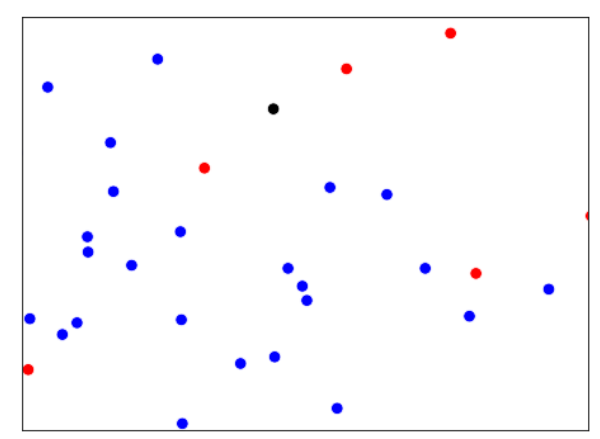

## Ejemplo

In [126]:
import pandas as pd

# leemos dataset

df_diabetes = pd.read_csv('diabetes_clean.csv')

df_diabetes.head()

df_diabetes.shape

(768, 9)

In [127]:
# Antes de dividir dataset en entrenamiento y test, tengo que quitar la columna a predecir

X = df_diabetes.drop(columns=['diabetes'])

# Vemos que X es el dataset original sin la columna a predecir
X.head()

# Me guardo en un array los valores a predecir

y = df_diabetes['diabetes']

y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

In [128]:
# Separamos entre entrenamiento y test

from sklearn.model_selection import train_test_split

# Separamos dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [129]:
# Entrenamos Modelo

from sklearn.neighbors import KNeighborsClassifier

# Creamos KNN

knn = KNeighborsClassifier(n_neighbors=3)

# Entrenamos modelo

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [130]:
# Testeamos modelo

res = knn.predict(X_test)

# Nos llega un paciente

data_predict = pd.DataFrame([{'pregnancies': 2, 'glucose': 148, 'dialostic': 76, 'triceps': 30, 'insulin': 70, 'bmi': 30, 'dpf': 0.5, 'age': 45}])

knn.predict(data_predict)

c:\Users\informatica\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dialostic
Feature names seen at fit time, yet now missing:
- diastolic

  warnings.warn(message, FutureWarning)


array([0], dtype=int64)

In [131]:
# Miramos calidad del modelo

knn.score(X_test, y_test)

0.6948051948051948

In [132]:
# Comprobamos la calidad real del modelo haciendo cross validation

from sklearn.model_selection import cross_val_score
import numpy as np

# Hacemos lo que equivaldria a un train split 5 veces

cv_scores = cross_val_score(knn, X, y, cv=5)

# Miramos los resultados

print(np.mean(cv_scores))

0.7135557253204311


In [133]:
# Miramos para otro numero de n_neighbors

# Creamos KNN

knn = KNeighborsClassifier(n_neighbors=7)

# Entrenamos modelo

knn.fit(X_train, y_train)

# Hacemos lo que equivaldria a un train split 5 veces

cv_scores = cross_val_score(knn, X, y, cv=5)

print(np.mean(cv_scores))

0.7357185298361768


In [134]:
from sklearn.model_selection import GridSearchCV

# Creamos modelo

knn_opt = KNeighborsClassifier()

# Creamos diccionario con los parametros a probar

param = {'n_neighbors': np.arange(1, 50)}

# Creamos GridSearch

knn_gscv = GridSearchCV(knn_opt, param, cv=5)

# Entrenamos modelo

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [135]:
# Dame la cantidad optima de vecinos

knn_gscv.best_params_

{'n_neighbors': 14}

In [136]:
# Dame la accuracy con 14

knn_gscv.best_score_

0.7578558696205755

### Ejercicio

En este ejercicio, construiremos un modelo de clasificación utilizando el conjunto de datos telecom_churn.

Utilizando el método KNN queremos clasificar si una cliente se va a dara de bajar a partir de su  'account_length' y de su 'customer_service_calls'.

Obtén las predicciones de tu modelo.


In [137]:
# Importamos dataset telecom_churn_clean.csv teniendo el cuenta que la primera columna es el indice

telecom_churn_df = pd.read_csv('telecom_churn_clean.csv', index_col=0)

telecom_churn_df.head()

# Antes de dividir dataset en entrenamiento y test, tengo que quitar la columna a predecir

X = telecom_churn_df.drop(columns=['churn'])

# Vemos que X es el dataset original sin la columna a predecir
X.head()

# Me guardo en un array los valores a predecir

y = telecom_churn_df['churn']

y.head()

# Separamos dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Creamos KNN

knn = KNeighborsClassifier(n_neighbors=3)

# Entrenamos modelo

knn.fit(X_train, y_train)

# Testeamos modelo

res = knn.predict(X_test)

# Miramos calidad del modelo

print(knn.score(X_test, y_test))

# Hacemos lo que equivaldria a un train split 5 veces

cv_scores = cross_val_score(knn, X, y, cv=5)

# Miramos los resultados

print(np.mean(cv_scores))

0.8500749625187406
0.8598876237556897


Mediante Cross validation, indica la accuracy de tu modelo. Prueba para n_neighbors de 4 a 11. Muestra las acuracys en un gràfico

0.8757891324607966
0.8730877804341072
0.8763879321600461
0.8739864302083193
0.8745874810342575
0.8775873324598962
0.8766877822350088
0.8796885341113226


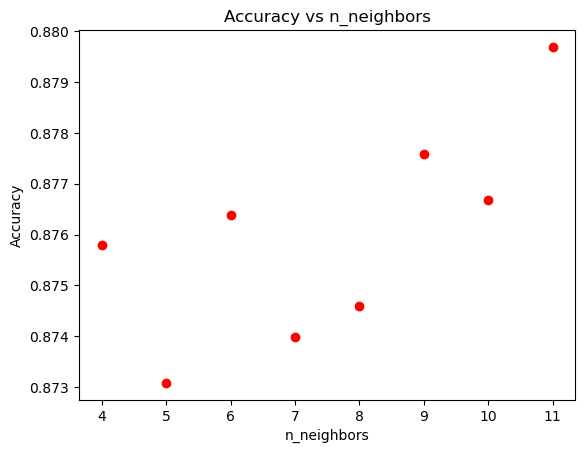

In [138]:
# Mediante Cross validation, indica la accuracy de tu modelo. Prueba para n_neighbors de 4 a 11. Muestra las acuracys en un gràfico

# Creamos el grafico

import matplotlib.pyplot as plt

# Creamos un bucle para probar con diferentes n_neighbors
for i in range(4, 12):
    
        # Creamos KNN
    
        knn = KNeighborsClassifier(n_neighbors=i)
    
        # Hacemos lo que equivaldria a un train split 5 veces
    
        cv_scores = cross_val_score(knn, X, y, cv=5)
    
        # Miramos los resultados
    
        print(np.mean(cv_scores))

        # Creamos el grafico
        plt.plot(i, np.mean(cv_scores), 'ro')

# Mostramos el grafico
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_neighbors')
plt.show()

Mediante GridSearchCV obtén el n_neighbors óptimo e indica su accuracy. Vuelve a generar el modelo y predice si un cliente con: account_length = 103 y customer_service_calls = 25 se darà de baja.

In [139]:
# Creamos modelo

knn_opt = KNeighborsClassifier()

# Creamos diccionario con los parametros a probar

param = {'n_neighbors': np.arange(1, 50)}

# Creamos GridSearch

knn_gscv = GridSearchCV(knn_opt, param, cv=5)

# Entrenamos modelo

knn_gscv.fit(X, y)

# Dame la cantidad optima de vecinos y su mejor accuracy

print('Mejor cantidad de vecinos:',knn_gscv.best_params_, 'Mejor accuracy:', knn_gscv.best_score_)

# Creamos KNN

knn = KNeighborsClassifier(n_neighbors=11)

# Entrenamos modelo

knn.fit(X_train, y_train)

# Nos llega un cliente
data_predict = pd.DataFrame([{'account_length': 103, 'area_code': 415, 'international_plan': 0, 'voice_mail_plan': 0, 'number_vmail_messages': 0, 'total_day_minutes': 156.6, 'total_day_calls': 71, 'total_day_charge': 26.62, 'total_eve_minutes': 188.5, 'total_eve_calls': 94, 'total_eve_charge': 16.05, 'total_night_minutes': 215.8, 'total_night_calls': 90, 'total_night_charge': 9.72, 'total_intl_minutes': 10.1, 'total_intl_calls': 3, 'total_intl_charge': 2.73, 'customer_service_calls': 25}])

res = knn.predict(data_predict)

if res.item() == 1:
    print('El cliente se va a ir')
else:
    print('El cliente se queda')

Mejor cantidad de vecinos: {'n_neighbors': 11} Mejor accuracy: 0.8796885341113226
El cliente se queda


## Linear regression SickitLearn

A partir del dataset sales df, entrena tu modelo para predecir las ventas a partir de la inversión en los diferentes medios.

PD: Deberás hacer split en train/test.

Indica la accuracy de tu modelo

In [156]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

sales_df = pd.read_csv('advertising_and_sales_clean.csv')

X = sales_df.drop('sales', axis=1)
X = sales_df.drop('influencer', axis=1)
y = sales_df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos modelo

model = LinearRegression()

# Entrenamos modelo

model.fit(X_train, y_train)

# Testeamos modelo

res = model.predict(X_test)

# Miramos calidad del modelo

print(r2_score(y_test, res))

1.0


Mediante cross validation obtén el valor de tu modelo.
Al ser una regressión el método cross_val_score te da el Rsquared.

In [157]:
#Mediante cross validation obtén el valor de tu modelo.
#Al ser una regressión el método cross_val_score te da el Rsquared.

from sklearn.model_selection import cross_val_score

# Creamos modelo

model = LinearRegression()

# Hacemos lo que equivaldria a un train split 5 veces

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Miramos los resultados

print(np.mean(cv_scores))

-4.3684594379463185e-21
